In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
import MetaTrader5 as mt5
from account_credentials import LOGIN,PASSWORD,SERVER
from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [3]:
is_initialized = mt5.initialize()
print('initialize: ', is_initialized)

is_logged_in = mt5.login(LOGIN, PASSWORD, SERVER)
print('logged in: ', is_logged_in)
print('\n')
account_info = mt5.account_info()
print(datetime.now(),
    '| Login: ', account_info.login,
    '| Balance: ', account_info.balance,
    '| Equity: ' , account_info.equity)

initialize:  True
logged in:  True


2023-05-06 12:44:42.014500 | Login:  114123121 | Balance:  484.96 | Equity:  484.96


In [8]:
symbol = 'XAUUSD'
number_of_date= 10000
timeframe = mt5.TIMEFRAME_H1
from_date = datetime.now()

df = pd.DataFrame(mt5.copy_rates_from(symbol,timeframe,from_date,number_of_date))
df["time"] = pd.to_datetime(df["time"], unit="s")
df = df.rename(columns={'time': 'date','tick_volume':'volume'})
df = df[['date','open','high','low','close','volume']]
df = df.set_index("date")


df['RSI'] = ta.rsi(df.close, length = 15)
df['EMAF'] = ta.ema(df.close, length = 20)
df['EMAM'] = ta.ema(df.close, length = 100)
df['EMAS'] = ta.ema(df.close, length = 150)
# df['Target'] = df['close'] - df.open
# df['Target'] = df['Target'].shift(-1)

# df['TargetClass'] = [1 if df.Target[i] > 0 else 0 for i in range(len(df))]
df['Target-Next-High'] = df['high'].rolling(window=4).max().shift(-4)


df.dropna(inplace = True)
df.reset_index(inplace = True)
df.drop(['date','volume'], axis=1 , inplace=True)
# df = df[0:100]
df_h = df
print(df_h.head()) # just to make sure that sorted from old to new

       open      high       low     close        RSI         EMAF   
0  1829.266  1830.340  1828.077  1830.059  78.146971  1818.498096  \
1  1830.030  1832.750  1829.567  1831.197  79.160276  1819.707515   
2  1831.148  1831.346  1829.865  1830.445  76.644073  1820.730133   
3  1830.431  1830.565  1828.256  1828.554  70.598074  1821.475263   
4  1828.508  1828.890  1827.242  1827.629  67.795210  1822.061333   

          EMAM         EMAS  Target-Next-High  
0  1811.976530  1809.489393          1832.750  
1  1812.357134  1809.776911          1831.346  
2  1812.715309  1810.050661          1830.565  
3  1813.028947  1810.295738          1830.206  
4  1813.318057  1810.525318          1830.206  


##### Adding Features

In [9]:
symbol = 'XAUUSD'
number_of_date= 10000
timeframe = mt5.TIMEFRAME_H1
from_date = datetime.now()

dfl = pd.DataFrame(mt5.copy_rates_from(symbol,timeframe,from_date,number_of_date))
dfl["time"] = pd.to_datetime(dfl["time"], unit="s")
dfl = dfl.rename(columns={'time': 'date','tick_volume':'volume'})
dfl = dfl[['date','open','high','low','close','volume']]
dfl = dfl.set_index("date")
#print(dfl.head()) # just to make sure that sorted from old to new

dfl['RSI'] = ta.rsi(dfl.close, length = 15)
dfl['EMAF'] = ta.ema(dfl.close, length = 20)
dfl['EMAM'] = ta.ema(dfl.close, length = 100)
dfl['EMAS'] = ta.ema(dfl.close, length = 150)
# df['Target'] = df['close'] - df.open
# df['Target'] = df['Target'].shift(-1)

# df['TargetClass'] = [1 if df.Target[i] > 0 else 0 for i in range(len(df))]
dfl['Taret-Next-Low'] = dfl['low'].rolling(window=4).min().shift(-4)


dfl.dropna(inplace = True)
dfl.reset_index(inplace = True)
dfl.drop(['date','volume'], axis=1 , inplace=True)
# df = df[0:100]
df_l = dfl
print(df_l.head()) # just to make sure that sorted from old to new

       open      high       low     close        RSI         EMAF   
0  1829.266  1830.340  1828.077  1830.059  78.146971  1818.498096  \
1  1830.030  1832.750  1829.567  1831.197  79.160276  1819.707515   
2  1831.148  1831.346  1829.865  1830.445  76.644073  1820.730133   
3  1830.431  1830.565  1828.256  1828.554  70.598074  1821.475263   
4  1828.508  1828.890  1827.242  1827.629  67.795210  1822.061333   

          EMAM         EMAS  Taret-Next-Low  
0  1811.976530  1809.489393        1827.242  
1  1812.357134  1809.776911        1827.242  
2  1812.715309  1810.050661        1827.242  
3  1813.028947  1810.295738        1825.526  
4  1813.318057  1810.525318        1825.141  


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler_x = StandardScaler().fit(df.iloc[:,:8])
scaled_x = scaler_x.transform(df.iloc[:,:8])
scaler_y = StandardScaler().fit(df.iloc[:,8].values.reshape(-1, 1))
scaled_y = scaler_y.transform(df.iloc[:,8].values.reshape(-1, 1))
scaled_x.shape

In [16]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaled_x = scaler_x.fit_transform(df_h.iloc[:,:8])
print(scaled_x.shape)
# scaled_x
scaler_y_h = MinMaxScaler(feature_range=(0,1))
scaled_y_h = scaler_y_h.fit_transform(df_h.iloc[:,8].values.reshape(-1, 1))
print(scaled_y_h.shape)
#scaled_y
scaler_y_l = MinMaxScaler(feature_range=(0,1))
scaled_y_l = scaler_y_l.fit_transform(df_l.iloc[:,8].values.reshape(-1, 1))
print(scaled_y_l.shape)
#scaled_y

(9847, 8)
(9847, 1)
(9847, 1)


In [17]:
X = []
backcandles = 30
print(scaled_x.shape[0])
for j in range(8): 
    X.append([])
    for i in range(0, scaled_x.shape[0]-backcandles+1):
        X[j].append(scaled_x[i:i+backcandles, j])
print(np.array(X).shape)

X = np.moveaxis(X, [0], [2])  # move the feature axis to the second dimension
print(X.shape)

# # Save the array to a CSV file
# np.savetxt('arrayx.csv', scaled_x, delimiter=',')
# np.savetxt('arrayy.csv', scaled_y, delimiter=',')

9847
(8, 9818, 30)
(9818, 30, 8)


In [ ]:
X[0,0,:]

In [ ]:
X[0,:,0]

In [18]:
# X = X
y_h = scaled_y_h[(scaled_y_h.shape[0]-X.shape[0]):,:] # matching the shape of X
y_l = scaled_y_l[(scaled_y_l.shape[0]-X.shape[0]):,:] # matching the shape of X
# y = np.reshape(y,(len(y),1))
print(X.shape) # 3D X has 8 colume and each colume contain xx backcandles (row, backcandle, column)
print(y_h.shape) # 2D contain 1 value (it's 1D array that reshape into 2D array)
print(y_l.shape) # 2D contain 1 value (it's 1D array that reshape into 2D array)

(9818, 30, 8)
(9818, 1)
(9818, 1)


In [22]:
proportion = int(len(X)*0.8)
X_train, X_test = X[:proportion],X[proportion:]
y_train_h, y_test_h = y_h[:proportion],y_h[proportion:]
y_train_l, y_test_l = y_l[:proportion],y_l[proportion:]
print(X_train.shape)
print(y_train_h.shape)
print(y_train_l.shape)
print(X_test.shape)
print(y_test_h.shape)
print(y_test_l.shape)


(7854, 30, 8)
(7854, 1)
(7854, 1)
(1964, 30, 8)
(1964, 1)
(1964, 1)


In [ ]:
X[proportion,-1,:] # row สุดท้ายของ X_test

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the Sequential model
model_h = Sequential()

# Add the LSTM layer with 150 units and input shape (backcandles, 8)
model_h.add(LSTM(units=150, input_shape=(backcandles, 8), name='lstm_layer'))

# Add a dense layer with a single output neuron and linear activation function
model_h.add(Dense(units=1, activation='linear', name='output'))

# Compile the model with the Adam optimizer and mean squared error loss function
model_h.compile(optimizer='adam', loss='mse')

# Train the model on the training data with a batch size of 15 and for 30 epochs
model_h.fit(x=X_train, y=y_train_h, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test_h))


Epoch 1/30
524/524 [==============================] - 5s 8ms/step - loss: 0.0013 - val_loss: 3.6075e-04
Epoch 2/30
524/524 [==============================] - 4s 8ms/step - loss: 1.8303e-04 - val_loss: 2.2675e-04
Epoch 3/30
524/524 [==============================] - 4s 7ms/step - loss: 1.8264e-04 - val_loss: 2.0560e-04
Epoch 4/30
524/524 [==============================] - 4s 7ms/step - loss: 1.6837e-04 - val_loss: 2.1940e-04
Epoch 5/30
524/524 [==============================] - 4s 7ms/step - loss: 1.6191e-04 - val_loss: 1.9195e-04
Epoch 6/30
524/524 [==============================] - 4s 7ms/step - loss: 1.6041e-04 - val_loss: 1.9179e-04
Epoch 7/30
524/524 [==============================] - 4s 7ms/step - loss: 1.5862e-04 - val_loss: 1.8922e-04
Epoch 8/30
524/524 [==============================] - 4s 7ms/step - loss: 1.5023e-04 - val_loss: 3.9241e-04
Epoch 9/30
524/524 [==============================] - 4s 8ms/step - loss: 1.5809e-04 - val_loss: 1.8566e-04
Epoch 10/30
524/524 [===========

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the Sequential model
model_l = Sequential()

# Add the LSTM layer with 150 units and input shape (backcandles, 8)
model_l.add(LSTM(units=150, input_shape=(backcandles, 8), name='lstm_layer'))

# Add a dense layer with a single output neuron and linear activation function
model_l.add(Dense(units=1, activation='linear', name='output'))

# Compile the model with the Adam optimizer and mean squared error loss function
model_l.compile(optimizer='adam', loss='mse')

# Train the model on the training data with a batch size of 15 and for 30 epochs
model_l.fit(x=X_train, y=y_train_l, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test_l))


Epoch 1/30
524/524 [==============================] - 6s 9ms/step - loss: 0.0022 - val_loss: 3.2699e-04
Epoch 2/30
524/524 [==============================] - 4s 8ms/step - loss: 2.0914e-04 - val_loss: 2.1103e-04
Epoch 3/30
524/524 [==============================] - 4s 8ms/step - loss: 1.8795e-04 - val_loss: 1.9878e-04
Epoch 4/30
524/524 [==============================] - 4s 8ms/step - loss: 1.8837e-04 - val_loss: 1.8671e-04
Epoch 5/30
524/524 [==============================] - 4s 8ms/step - loss: 1.8603e-04 - val_loss: 2.0328e-04
Epoch 6/30
524/524 [==============================] - 4s 8ms/step - loss: 1.9621e-04 - val_loss: 1.8451e-04
Epoch 7/30
524/524 [==============================] - 4s 8ms/step - loss: 1.8262e-04 - val_loss: 3.2399e-04
Epoch 8/30
524/524 [==============================] - 4s 8ms/step - loss: 1.7373e-04 - val_loss: 1.7878e-04
Epoch 9/30
524/524 [==============================] - 4s 8ms/step - loss: 1.7580e-04 - val_loss: 2.2438e-04
Epoch 10/30
524/524 [===========

In [ ]:
best_model = None
best_loss = float('inf')

for i in range(20):
    # Define the Sequential model
    model_loop = Sequential()

    # Add the LSTM layer with 150 units and input shape (backcandles, 8)
    model_loop.add(LSTM(units=150, input_shape=(backcandles, 8), name='lstm_layer'))

    # Add a dense layer with a single output neuron and linear activation function
    model_loop.add(Dense(units=1, activation='linear', name='output'))

    # Compile the model with the Adam optimizer and mean squared error loss function
    model_loop.compile(optimizer='adam', loss='mse')

    # Train the model on the training data with a batch size of 15 and for 30 epochs
    model_loop.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))

    # Evaluate the model on the validation data
    val_loss = model_loop.evaluate(x=X_test, y=y_test)

    # If this is the best model so far, store it
    if val_loss < best_loss:
        model = model_loop
        best_loss = val_loss

print(f'The best model has a validation loss of {best_loss}.')


In [25]:
model_h.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer (LSTM)           (None, 150)               95400     
                                                                 
 output (Dense)              (None, 1)                 151       
                                                                 
Total params: 95,551
Trainable params: 95,551
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_l.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer (LSTM)           (None, 150)               95400     
                                                                 
 output (Dense)              (None, 1)                 151       
                                                                 
Total params: 95,551
Trainable params: 95,551
Non-trainable params: 0
_________________________________________________________________


In [31]:
y_hat_h = model_h.predict(X_test)
y_hat_l = model_l.predict(X_test)
# for i in range(10):
#     print(y_hat[i], y_test[i])

62/62 [==============================] - 0s 4ms/step


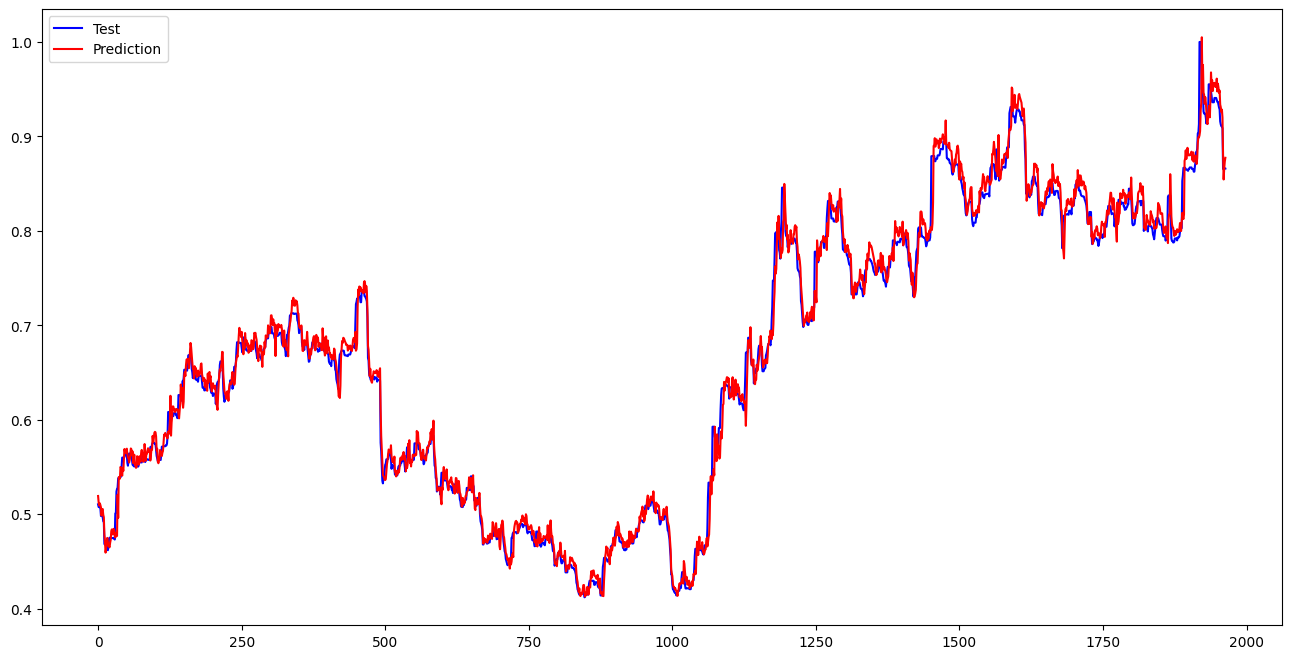

In [28]:
plt.figure(figsize=(16,8))
plt.plot(y_test_h, color = 'blue', label = 'Test')
plt.plot(y_hat_h, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

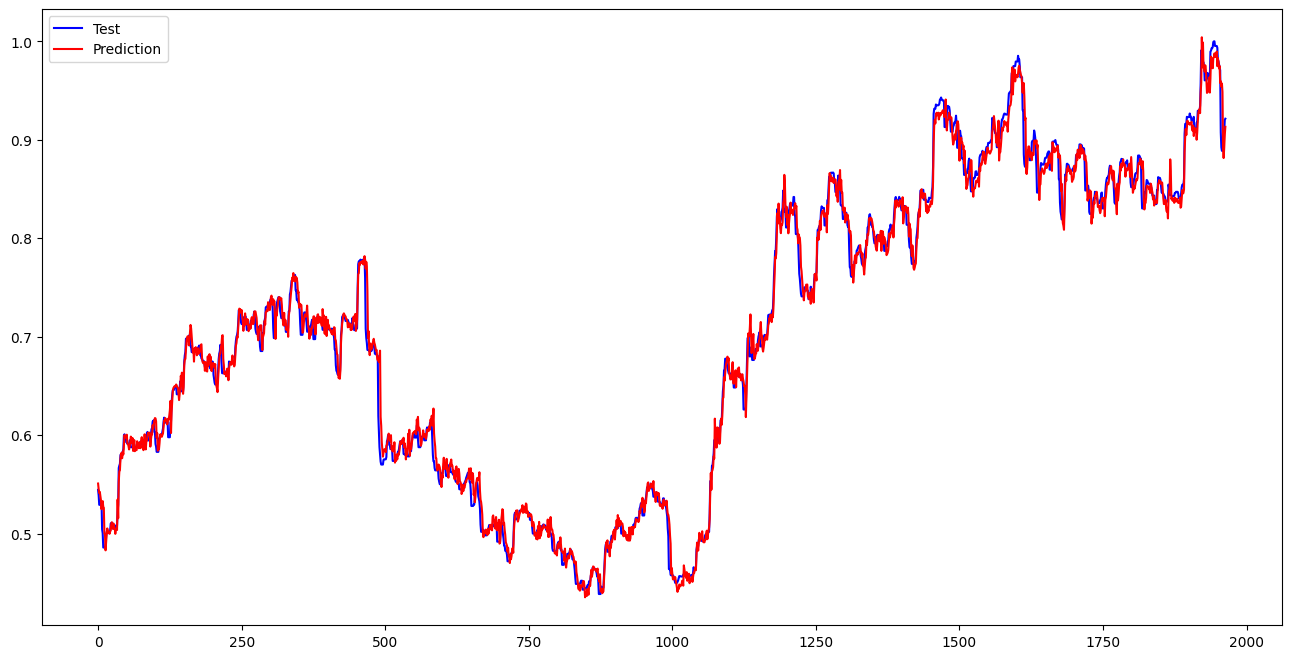

In [32]:
plt.figure(figsize=(16,8))
plt.plot(y_test_l, color = 'blue', label = 'Test')
plt.plot(y_hat_l, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

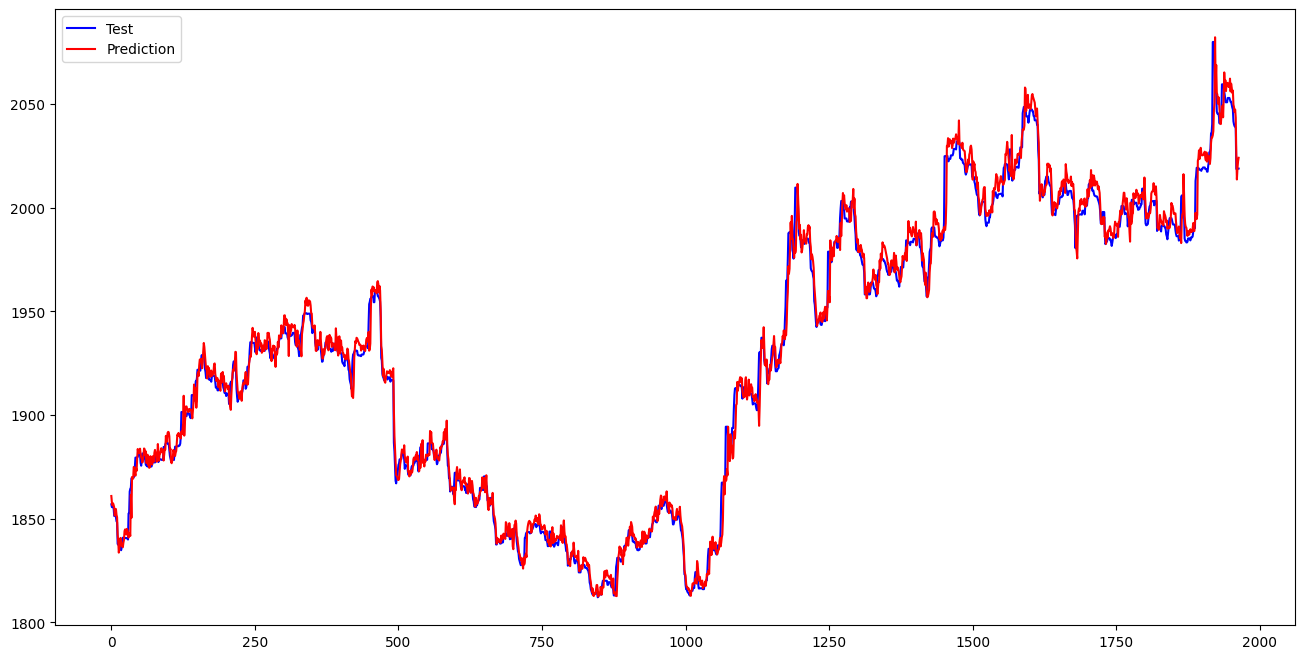

In [33]:
y_hat_inverse_h = scaler_y_h.inverse_transform(y_hat_h)
# print("y predict",y_hat_inverse)
# print()
y_test_inverse_h = scaler_y_h.inverse_transform(y_test_h)
# print("y actual",y_test_inverse)
plt.figure(figsize=(16,8))
plt.plot(y_test_inverse_h, color = 'blue', label = 'Test')
plt.plot(y_hat_inverse_h, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

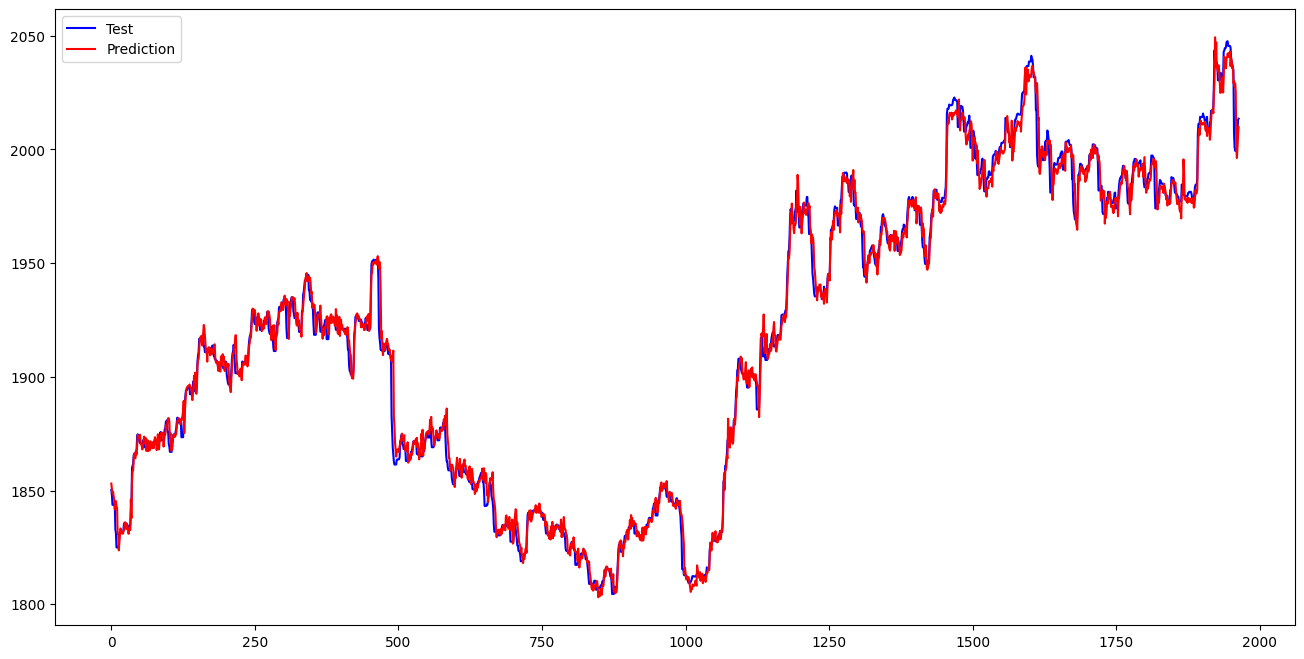

In [34]:
y_hat_inverse_l = scaler_y_l.inverse_transform(y_hat_l)
# print("y predict",y_hat_inverse)
# print()
y_test_inverse_l = scaler_y_l.inverse_transform(y_test_l)
# print("y actual",y_test_inverse)
plt.figure(figsize=(16,8))
plt.plot(y_test_inverse_l, color = 'blue', label = 'Test')
plt.plot(y_hat_inverse_l, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

In [35]:
def my_eva(model,X_train,y_train,X_test,y_test):
    # Evaluate the model on the test data
    loss = model.evaluate(X_test, y_test)

    # Print the mean squared error loss
    print('Test loss:', loss)

    # Generate predictions on the test data
    y_pred = model.predict(X_test)

    # Compute the mean squared error (MSE) and root mean squared error (RMSE)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Compute the coefficient of determination (R-squared)
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)

    # Print the performance metrics
    print("TEST SET")
    print('Mean squared error (MAE)(loss):', mae)
    print('Mean squared error (MSE)(loss):', mse)
    print('Root mean squared error (RMSE):', rmse)
    print('R-squared (R2):', r2)
    print()

    loss = model.evaluate(X_train, y_train)
    print('Training loss:', loss)

    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_train, y_pred)
    print("TRAINING SET")
    print('Mean squared error (MAE)(loss):', mae)
    print('Mean squared error (MSE):', mse)
    print('Root mean squared error (RMSE):', rmse)
    print('R-squared (R2):', r2) # one is good 0 is bad, the value range from 0 to 1

In [37]:
my_eva(model_h,X_train,y_train_h,X_test,y_test_h)

62/62 [==============================] - 0s 4ms/step - loss: 1.8893e-04
Test loss: 0.00018892645312007517
62/62 [==============================] - 0s 4ms/step
TEST SET
Mean squared error (MAE)(loss): 0.009902002494547469
Mean squared error (MSE)(loss): 0.00018892653718540137
Root mean squared error (RMSE): 0.01374505500845309
R-squared (R2): 0.9914792025704993

246/246 [==============================] - 1s 4ms/step - loss: 1.2041e-04
Training loss: 0.00012040720321238041
246/246 [==============================] - 1s 4ms/step
TRAINING SET
Mean squared error (MAE)(loss): 0.007989248734341356
Mean squared error (MSE): 0.00012040720580922843
Root mean squared error (RMSE): 0.010973021726453858
R-squared (R2): 0.9962411027139347


In [38]:
my_eva(model_l,X_train,y_train_l,X_test,y_test_l)

62/62 [==============================] - 0s 4ms/step - loss: 1.5957e-04
Test loss: 0.0001595655776327476
62/62 [==============================] - 0s 4ms/step
TEST SET
Mean squared error (MAE)(loss): 0.008536565298998832
Mean squared error (MSE)(loss): 0.0001595656545883851
Root mean squared error (RMSE): 0.012631929962930648
R-squared (R2): 0.9932253746640708

246/246 [==============================] - 1s 4ms/step - loss: 1.3570e-04
Training loss: 0.0001356975844828412
246/246 [==============================] - 1s 4ms/step
TRAINING SET
Mean squared error (MAE)(loss): 0.00749862781620467
Mean squared error (MSE): 0.0001356975971405841
Root mean squared error (RMSE): 0.011648931158719417
R-squared (R2): 0.9960763685048807


In [39]:
def my_diff(y_hat_inverse,y_test_inverse):
    #อันนี้ถ้าได้ค่าเป็นบวก ก็แค่บอกเป็นความในว่า ใน data ที่ใช้ test นี้ ส่วนไหญ่แล้วมี Tredn ราคาหลักไปทางนั้งมากกว่า เช่น ถ้าเป็น positve แปลว่าส่วนมาก ราคาขึ้น negative ก็แปลว่าส่วนมากราคาลง
    diff = []
    for i in range(0,len(y_hat_inverse)):
        val = float(y_hat_inverse[i] - y_test_inverse[i])
        diff.append(val)
    pred_diff = sum(diff)/len(diff)
    print(f"pred_diff {pred_diff}")

    #อาจจะเป็น predict long or short ก็ได้ regardless of neg or pos, see below
    # Predict < ClosePrice(from predict) > actual ---> Short ---> P - a = Positive Value
    # Predict < ClosePrice(from predict) < actual ---> Short ---> P - a = Negative Value
    # Predict > ClosePrice(from predict) > actual ---> Long ---> P - a = Positive Value
    # Predict > ClosePrice(from predict) < actual ---> Long ---> P - a = Negative Value
    # ด้วยเหตุผลนี้ ใช้ เป็น abs น่าจะ make sense มากกว่าในการทำ simulation
    diff_pos = []
    diff_neg = []
    v_zero = []
    for i in range(0,len(y_hat_inverse)):
        val = float(y_hat_inverse[i] - y_test_inverse[i])
        if val > 0:
            diff_pos.append(val)
        elif val < 0:
            diff_neg.append(val)
        elif val ==0:
            v_zero.append(val)
        else:
            raise ValueError("All conditions were not met")
    pred_diff_pos = sum(diff_pos)/len(diff_pos)
    pred_diff_neg = sum(diff_neg)/len(diff_neg)
    print(f"pred_diff_pos {pred_diff_pos}")
    print(f"pred_diff_neg {pred_diff_neg}")
    print(f"v_zero {v_zero}")

    #ใช้อันนี้น่าจะ make sense สุดเพราะ เราไม่สามารถรู้ได้ว่ามันจะ เป็น Negative Diff หรือว่า Positive Diff, regardless what's the type of trading order is.
    diff = []
    for i in range(0,len(y_hat_inverse)):
        val = abs(float(y_hat_inverse[i] - y_test_inverse[i]))
        diff.append(val)
    pred_diff_abs = sum(diff)/len(diff)
    print(f"pred_diff_abs {pred_diff_abs}")

    return pred_diff, pred_diff_pos, pred_diff_neg,pred_diff_abs, v_zero

In [40]:
pred_diff_h, pred_diff_pos_h, pred_diff_neg_h,pred_diff_abs_h, v_zero_h = my_diff(y_hat_inverse_h,y_test_inverse_h)

pred_diff 1.192088910446638
pred_diff_pos 4.067606602753954
pred_diff_neg -5.5533759316439415
v_zero []
pred_diff_abs 4.511673097692052


In [41]:
pred_diff_l, pred_diff_pos_l, pred_diff_neg_l,pred_diff_abs_l, v_zero_l = my_diff(y_hat_inverse_l,y_test_inverse_l)

pred_diff 0.6412844820042016
pred_diff_pos 4.834113086159189
pred_diff_neg -2.7695022218374863
v_zero []
pred_diff_abs 3.695633673704808


#### Simulation

In [42]:
#Function to get prediction_raw (Didn't adjust with diff yet)
def get_pred(X_test_data,row,model,scaler_y):
    # Get a single input row
    input_row = X_test_data[row, :, :]  
    # print(f"shape {input_row.shape}")

    # Reshape the input row
    input_row = np.reshape(input_row, (1, input_row.shape[0], input_row.shape[1]))  
    # print(f"shape for prediction {input_row.shape}")

    # Make a prediction using the reshaped input row
    prediction_raw = model.predict(input_row)  
    prediction_raw = float(scaler_y.inverse_transform(prediction_raw)) 
    return prediction_raw


def get_act(y_test_data,row,scaler_y):
    actual_y = float(scaler_y.inverse_transform(y_test_data[row,:].reshape(-1,1)))
    return actual_y

def get_close(three_d_features_data_set,row):
    features = scaler_x.inverse_transform(three_d_features_data_set[row,-1,:].reshape(1, -1))
    close = float(features[0,3]) # close_price is at location 3 in dataframe
    return close


In [89]:
actual_y = float(scaler_y.inverse_transform(y_test[0,:].reshape(-1,1)))


In [102]:
max(scaler_y.inverse_transform(y_test[0:5,:]))

array([1798.696])

In [92]:
y_test[0,:].shape

(1,)

In [98]:
scaler_y.inverse_transform(y_test[0:5,:])

array([[1795.383],
       [1797.658],
       [1797.444],
       [1798.696],
       [1798.673]])

In [97]:
scaler_y.inverse_transform(y_test)

array([[1795.383],
       [1797.658],
       [1797.444],
       ...,
       [1988.017],
       [1989.167],
       [1990.626]])

In [45]:
prediction_raw_h = get_pred(X_test,0,model_h,scaler_y_h)
actual_y_h = get_act(y_test_h,0,scaler_y_h)
prediction_raw_l = get_pred(X_test,0,model_l,scaler_y_l)
actual_y_l = get_act(y_test_l,0,scaler_y_l)
close = get_close(X_test,0)
print(f"prediction_raw_h {prediction_raw_h}")
print(f"actual_y_h {actual_y_h}")
print(f"prediction_raw_l {prediction_raw_l}")
print(f"actual_y_l {actual_y_l}")
print(f"close {close}")

1/1 [==============================] - 0s 15ms/step
prediction_raw_h 1860.9925537109375
actual_y_h 1856.972
prediction_raw_l 1853.08154296875
actual_y_l 1850.305
close 1856.885


In [65]:
#เนื่องจากพอสร้าง ออเด้อแล้วใช้ sl tp เท่ากัน ยังไงก็เสียมากกว่าเนื่องจาก spread
# if win >>> gain x
# if lost >>> loss x + spread

diff_h = pred_diff_abs_h
diff_l = pred_diff_abs_l
#########################
# diff_h = 0
# diff_l = 0
#########################
tp_sl_range = 3.1
spread = 200
spread = spread*0.0001

sim_result = pd.DataFrame({'order_type':[],'close':[], 'prediction_raw_h':[], 'prediction_raw_l':[], 'prediction':[], 'target_price':[], 'actual_y_h':[],'actual_y_l':[],'trade_result':[]})
sim_data = []

# for loop
for row in range(0,len(y_test_h)):
    close = get_close(X_test,row)
    # prediction_raw = get_pred(X_test,row)
    # actual_y = get_act(y_test,row)
    prediction_raw_h = get_pred(X_test,row,model_h,scaler_y_h)
    actual_y_h = get_act(y_test_h,row,scaler_y_h)
    prediction_raw_l = get_pred(X_test,row,model_l,scaler_y_l)
    actual_y_l = get_act(y_test_l,row,scaler_y_l)

    # LONG
    if prediction_raw_h == 0 and prediction_raw_l == 0:
        print("Do nothing")
        trade_result = "NothingC00"
    elif prediction_raw_h - close > tp_sl_range and prediction_raw_l - close < -tp_sl_range:
        print("Do nothing contradict prediction")
        trade_result = "NothingContradict"
    elif prediction_raw_h - close - diff_h > tp_sl_range:
        # define order type
        order_type = "L"
        # must be after prediction >= close
        target_price = close + tp_sl_range + spread # เพิ่ม spread เพิ่มเมื่อ win จะได้เอา spread คืน
        # must be after prediction >= close, because we don't know whether to plus or minus prediction with pred_diff
        prediction = prediction_raw_h - diff_h
        if prediction <= target_price:
            print("Do nothing")
            trade_result = "Nothing"
        elif prediction > target_price and actual_y_l - close > -tp_sl_range:
            print("Trade L loss")
            trade_result = "Loss"
        elif prediction > target_price and actual_y_h > target_price:
            print("trade L win")
            trade_result = "Win"
        elif prediction > target_price and actual_y_h < target_price:
            print("Trade L loss")
            trade_result = "Loss"
        else:
            print("error")
            trade_result = "Error"
            print(prediction)
    # SHORT
    elif prediction_raw_l + diff_l - close < -tp_sl_range:
        # define order type
        order_type = "S"
        # must be after prediction >= close
        target_price = close - tp_sl_range - spread # เพิ่ม spread เพิ่มเมื่อ win จะได้เอา spread คืน
        # must be after prediction >= close, because we don't know whether to plus or minus prediction with pred_diff
        prediction = prediction_raw_l + diff_l
        if prediction >= target_price:
            print("Do nothing")
            trade_result = "Nothing"
        elif prediction < target_price and actual_y_h - close > tp_sl_range:
            print("Trade L loss")
            trade_result = "Loss"
        elif prediction < target_price and actual_y_l < target_price:
            print("trade S win")
            trade_result = "Win"
        elif prediction < target_price and actual_y_l > target_price:
            print("Trade S loss")
            trade_result = "Loss"
        else:
            print("error")
            trade_result = "Error"
            print(prediction)

    elif not prediction_raw_h - close - diff_h > tp_sl_range and not prediction_raw_l + diff_l - close < -tp_sl_range:
        # print(prediction_raw_h)
        # print(prediction_raw_l)
        # print(close)
        trade_result = "NothingMet"
        target_price = "none"
        prediction = "none"
        order_type = "no trade"
    else:
        raise ValueError("Error condition not met")
    
    sim_data.append({'order_type':order_type,'close':close, 'prediction_raw_h':prediction_raw_h, 'prediction_raw_l':prediction_raw_l, 'prediction':prediction, 'target_price':target_price, 'actual_y_h':actual_y_h,'actual_y_l':actual_y_l,'trade_result':trade_result})

sim_result = pd.concat([sim_result, pd.DataFrame(sim_data)])

    # print(f"order type {order_type}")
    # print(f"close {close}")
    # print(f"prediction_raw {prediction_raw}")
    # print(f"prediction {prediction}")
    # print(f"target_price_l {target_price}")
    # print(f"actual_y {actual_y}")
    


1/1 [==============================] - 0s 17ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 18ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 18ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 15ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 16ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 17ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 17ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 16ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 15ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 15ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 16ms/step
Do nothing contradict prediction
1/1 [==============================] - 0s 15ms/step
Do nothing co

In [47]:
x =3
if x == 1:
    print(1)
elif x == 3:
    print(3)
if x == 3:
    print(32)

3
32


In [66]:
Nothing = (sim_result["trade_result"] == "Nothing").sum()
Win = (sim_result["trade_result"] == "Win").sum()
Lost = (sim_result["trade_result"] == "Loss").sum()
NothingContradict = (sim_result["trade_result"] == "NothingContradict").sum()
NothingC00 = (sim_result["trade_result"] == "NothingC00").sum()
print(f"Nothing {Nothing}")
print(f"Win {Win}")
print(f"Lost {Lost}")
print(f"NothingContradict {NothingContradict}")
print(f"NothingC00 {NothingC00}")

Win_rate =( Win / (Win + Lost) ) * 100
print(f"Win_rate {Win_rate}")
# mean_close = (sim_result["close"]).mean()
# mean_raw = (sim_result["prediction_raw"]).mean()
# mean_actual_y = (sim_result["actual_y"]).mean()
# print("mean_close",mean_close)
# print("mean_raw",mean_raw)
# print("mean_actual_y",mean_actual_y)
# op_l = ((sim_result["close"] - sim_result["actual_y"]) >= 3.1).sum()
# print("Opportunities L",op_l)
# op_s = ((sim_result["close"] - sim_result["actual_y"]) <= 3.1).sum()
# print("Opportunities S",op_s)



Nothing 1
Win 7
Lost 21
NothingContradict 1433
NothingC00 0
Win_rate 25.0


In [55]:
sim_result.to_csv("sim_result.csv")